In [3]:
%pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
%pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/TahaAnwar/pafy.git to c:\temp\pip-install-5mzwp6z4\pafy_3ee286117caf4baf9e7d3af265fe456d
  Resolved https://github.com/TahaAnwar/pafy.git to commit 2f3c473b3df7961721d07e1504675313afd1d2cb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/TahaAnwar/pafy.git 'C:\Temp\pip-install-5mzwp6z4\pafy_3ee286117caf4baf9e7d3af265fe456d'


In [1]:
import os
import cv2
import pafy
import random 
import numpy as np
import datetime as dt 
import tensorflow as tf
from collections import deque 
import matplotlib.pyplot as plt 

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.utils import plot_model

[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 17, 5, 44, 4, 26, 7, 7, 34, 3, 43, 9, 2, 8, 7, 17]
[31, 7, 25, 45, 8, 1

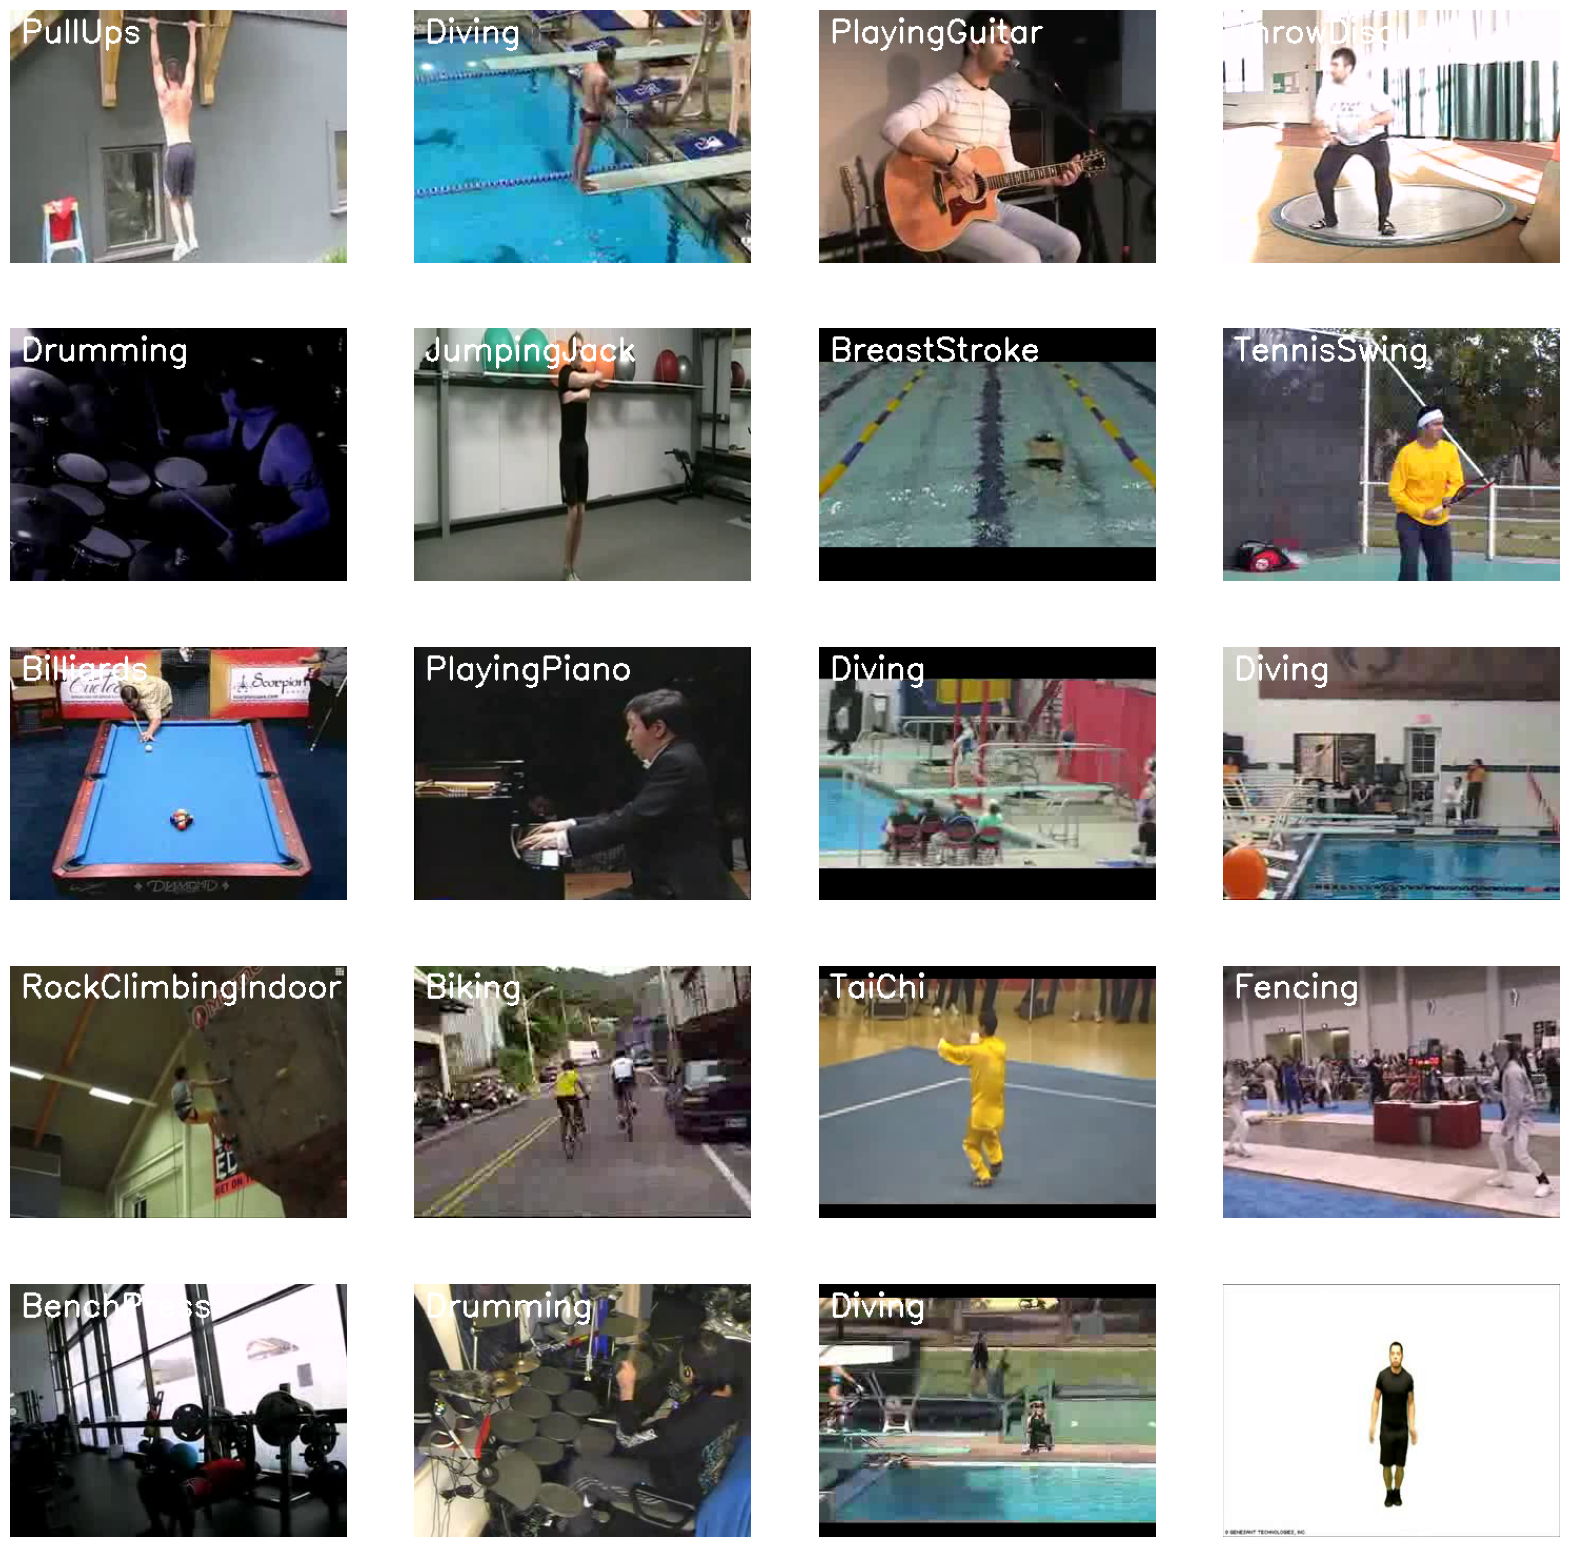

In [3]:
plt.figure(figsize=(20, 20))

all_classes_names = os.listdir('dataset/UCF50')

random_range = random.sample(range(len(all_classes_names)), 20)
random_range = [random.randint(0, len(all_classes_names)) for _ in range(20)]

SEQUENCE_LENGTH = 20

for counter, random_index in enumerate(random_range, 1):
    print(random_range)

    selected_class_name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'dataset/UCF50/{selected_class_name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'dataset/UCF50/{selected_class_name}/{selected_video_file_name}')

    _, bgr_frame = video_reader.read()

    video_reader.release()

    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')



In [17]:
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64

DATASET_DIR = 'dataset/UCF50'

CLASSES_LIST = ['WalkingWithDog', 'TaiChi', 'Swing', 'HorseRace']

In [8]:
def frames_extraction(video_path):
    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)

    video_reader.release()
    return frames_list

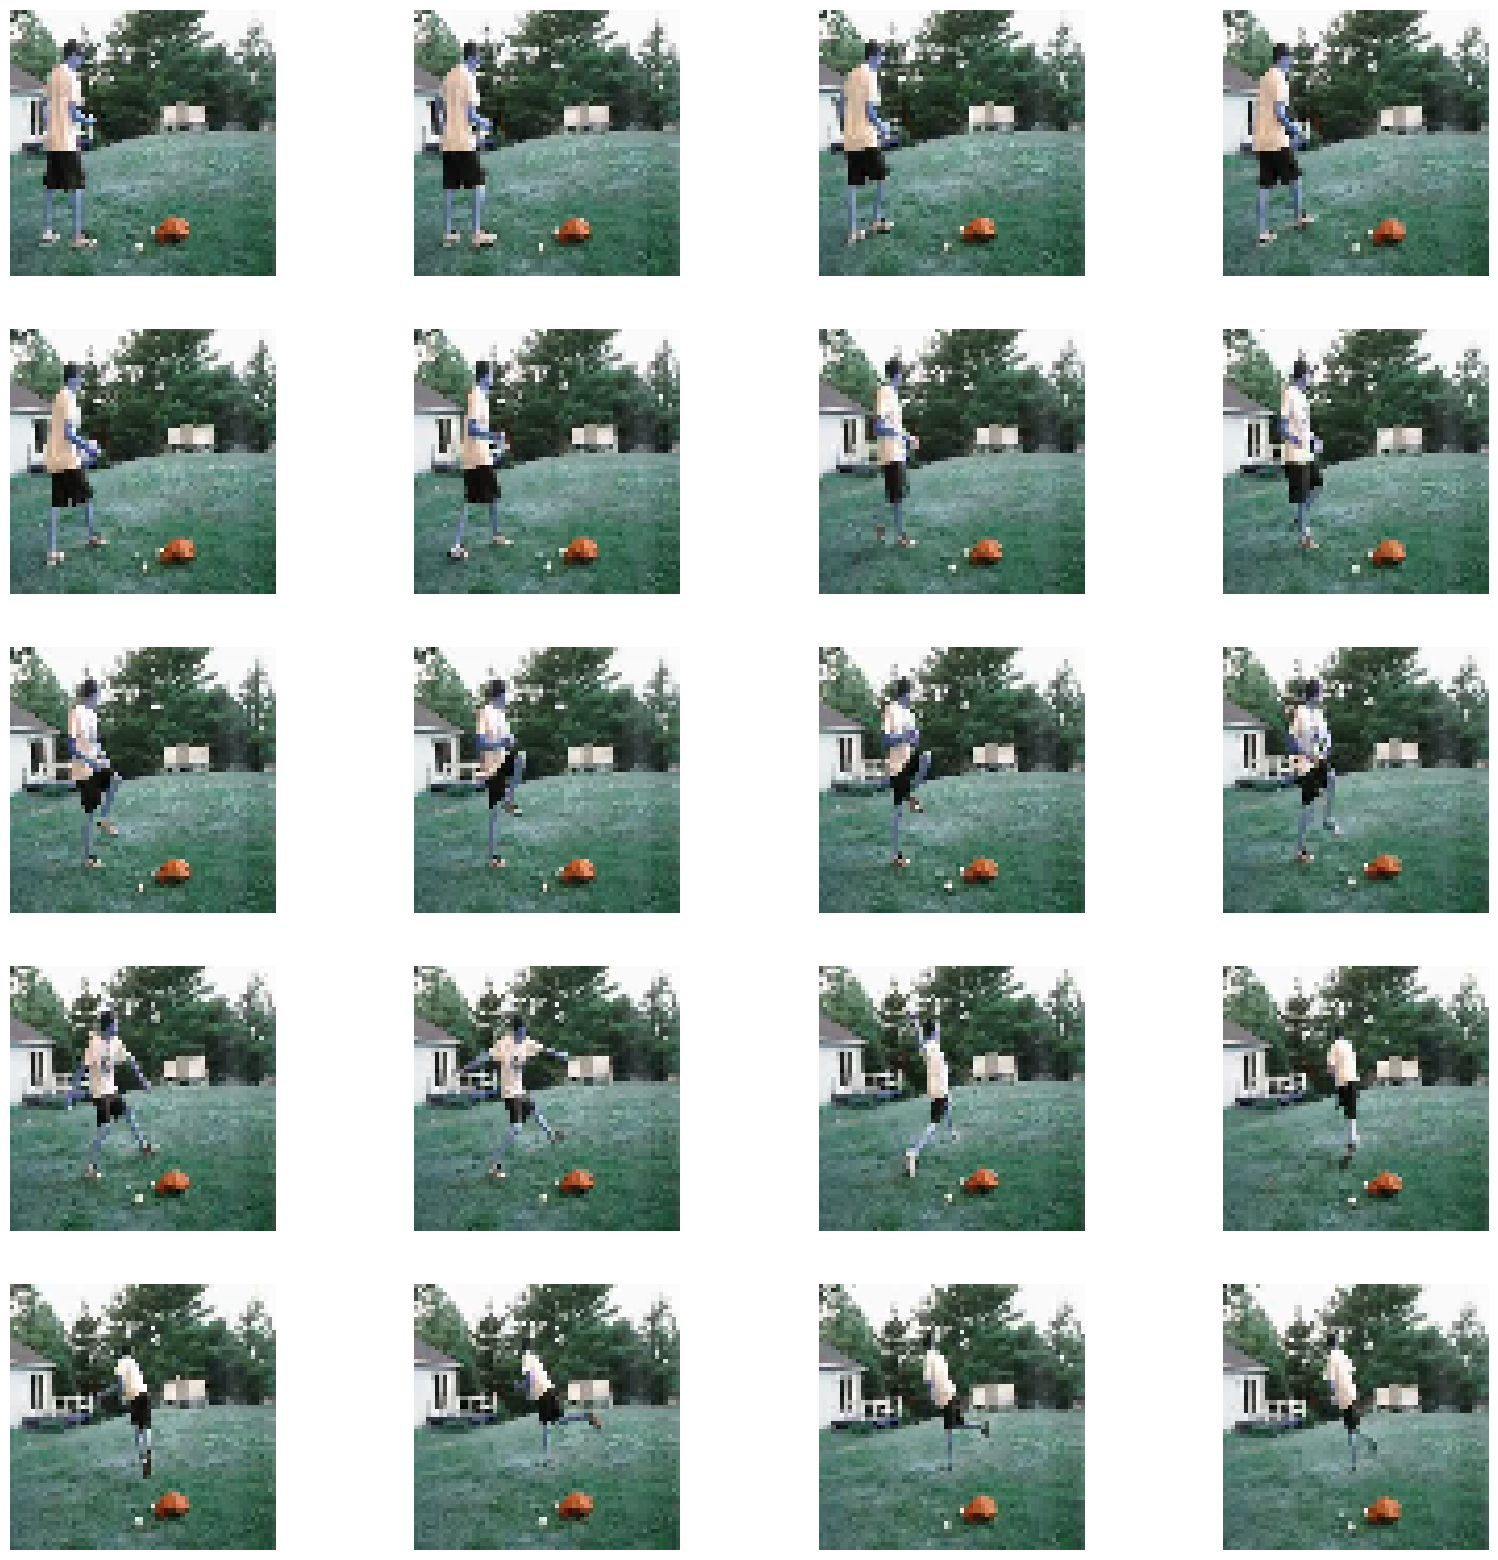

In [16]:
plt.figure(figsize=(20, 20))
counter = 1
for frame in frames_extraction('dataset/UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi'):
    plt.subplot(5, 4, counter);plt.imshow(frame);plt.axis('off')
    counter += 1

In [20]:
def create_dataset():
    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')

        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
    features = np.asarray(features)
    labels = np.array(labels)
    video_files_paths = np.array(video_files_paths)

    return features, labels, video_files_paths

In [21]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: TaiChi
Extracting Data of Class: Swing
Extracting Data of Class: HorseRace


In [22]:
one_hot_encoded_labels = to_categorical(labels)

In [23]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle=True)

In [35]:
def create_convlstm_model():
    model = Sequential()
    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), activation='tanh', data_format='channels_last',
                         recurrent_dropout=0.2, return_sequences=True,
                         input_shape= (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh', data_format='channels_last',
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters=14, kernel_size=(3, 3), activation='tanh', data_format='channels_last',
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', data_format='channels_last',
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(Flatten())

    model.add(Dense(len(CLASSES_LIST), activation='softmax'))

    model.summary()

    return model

In [36]:
model = create_convlstm_model()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_6 (ConvLSTM2D)      │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_7 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_8 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_9 (ConvLSTM2D)      │ (None, 20, 5, 5, 16)   │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 20, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 20, 3, 3, 16)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │        11,524 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,524 (173.92 KB)

 Trainable params: 44,524 (173.92 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 5, batch_size=4,
                                   shuffle=True, validation_split=0.2,
                                   callbacks=[early_stopping_callback])

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 479ms/step - accuracy: 0.3014 - loss: 1.3871 - val_accuracy: 0.4110 - val_loss: 1.3068
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 445ms/step - accuracy: 0.4905 - loss: 1.2307 - val_accuracy: 0.5890 - val_loss: 0.9627
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 32s 444ms/step - accuracy: 0.6485 - loss: 0.9292 - val_accuracy: 0.6575 - val_loss: 0.7440
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 510ms/step - accuracy: 0.7245 - loss: 0.7018 - val_accuracy: 0.6712 - val_loss: 0.6968
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 545ms/step - accuracy: 0.7104 - loss: 0.6722 - val_accuracy: 0.7397 - val_loss: 0.6653


In [39]:
model_evaluation_history = model.evaluate(features_test, labels_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - accuracy: 0.7180 - loss: 0.7466


In [41]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

model_file_name = f'model___Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss}__Accuracy_{model_evaluation_accuracy}.h5'

model.save(model_file_name)

In [42]:
def plot_metric(model_train_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_train_history.history[metric_name_1]
    metric_value_2 = model_train_history.history[metric_name_2]

    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)

    plt.title(str(plot_name))

    plt.legend()

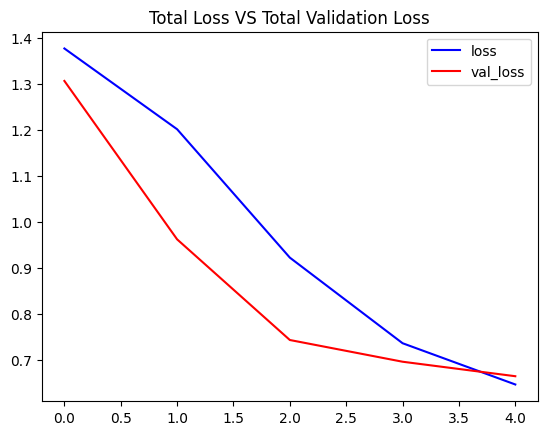

In [43]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss VS Total Validation Loss')

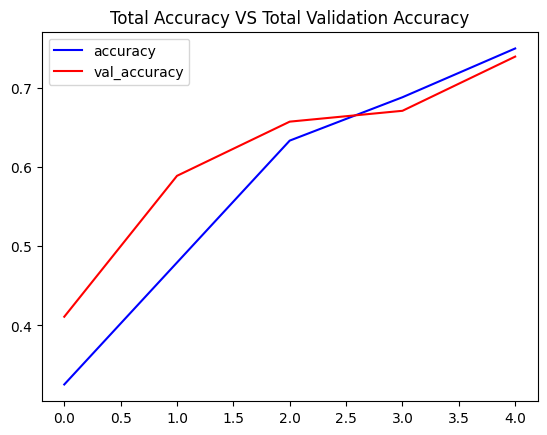

In [45]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy VS Total Validation Accuracy')

In [51]:
def create_LRCN_model():
    model = Sequential()

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same', activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation='softmax'))

    model.summary()

    return model

In [55]:
model = create_LRCN_model()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_34             │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_35             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_36             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_37             │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_38             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_39             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_40             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_41             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_42             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_43             │ (None, 20, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_44             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_45             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_46             │ (None, 20, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,060 (285.39 KB)

 Trainable params: 73,060 (285.39 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 10, batch_size=4,
                                   shuffle=True, validation_split=0.2,
                                   callbacks=[early_stopping_callback])

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.2975 - loss: 1.3911 - val_accuracy: 0.3562 - val_loss: 1.3795
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.3421 - loss: 1.3612 - val_accuracy: 0.4384 - val_loss: 1.3290
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - accuracy: 0.4844 - loss: 1.2642 - val_accuracy: 0.4795 - val_loss: 1.1913
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.5453 - loss: 1.0991 - val_accuracy: 0.5205 - val_loss: 1.0432
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - accuracy: 0.5869 - loss: 0.9956 - val_accuracy: 0.5753 - val_loss: 0.9546
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.6422 - loss: 0.8972 - val_accuracy: 0.6712 - val_loss: 0.8874
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.6749 - loss: 0.8395 - val_accuracy: 0.6438 - val_loss: 0.8508
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.6889 - loss: 0.7578 - val_accu

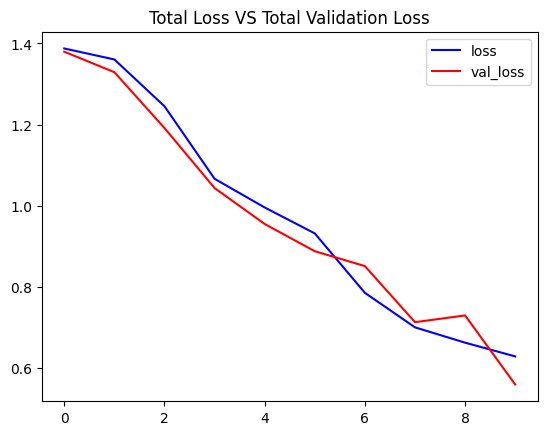

In [58]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss VS Total Validation Loss')

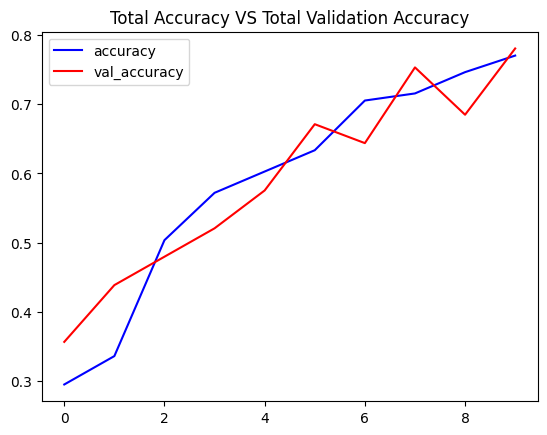

In [57]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy VS Total Validation Accuracy')

In [66]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    video_reader = cv2.VideoCapture(video_file_path)
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'),
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
    frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    predicted_class_name = ''

    while video_reader.isOpened():
        ok, frame = video_reader.read()

        if not ok:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            predicted_labels_probabilities = model.predict(np.expand_dims(frames_queue, axis=0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]

        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        video_writer.write(frame)
    video_reader.release()
    video_writer.release()

In [67]:
output_video_file_path = f'test.mp4'

predict_on_video('dataset/UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi', output_video_file_path, SEQUENCE_LENGTH)
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300, None)).ipython_display()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━

Moviepy - Done !
Moviepy - video ready __temp__.mp4
